In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
from bcb import Expectativas

In [4]:
service = Expectativas()
service.describe()

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoSelic
  ExpectativasMercadoTop5Selic
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais


In [5]:
ep = service.get_endpoint('ExpectativasMercadoTop5Anuais')

In [6]:
ep.Data

<Property Data<str>>

In [7]:
ep.Data.asc()

<Data asc>

In [11]:
query = (ep.query()
           .orderby(ep.Data.desc(), ep.Indicador.desc())
           .limit(5))
query.show()

URL:
  https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativasMercadoTop5Anuais
Query Parameters:
  $format = json
  $orderby = Data desc,Indicador desc
  $top = 5
Return: Indicador<str>, Data<str>, DataReferencia<str>, tipoCalculo<str>, Media<float>, Mediana<float>, DesvioPadrao<float>, Minimo<float>, Maximo<float>


In [21]:
query = (ep.query()
           .orderby(ep.Data.desc(), ep.Indicador.desc())
           .format("json")
           .limit(5))
query.show()

URL:
  https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativasMercadoTop5Anuais
Query Parameters:
  $format = json
  $orderby = Data desc,Indicador desc
  $top = 5
Return: Indicador<str>, Data<str>, DataReferencia<str>, tipoCalculo<str>, Media<float>, Mediana<float>, DesvioPadrao<float>, Minimo<float>, Maximo<float>


In [22]:
query.text()

'{"@odata.context":"https://was-p.bcnet.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata$metadata#ExpectativasMercadoTop5Anuais","value":[{"Indicador":"Taxa de desocupação","Data":"2023-07-07","DataReferencia":"2023","tipoCalculo":"M","Media":8.7240,"Mediana":8.8200,"DesvioPadrao":0.3554,"Minimo":8.1000,"Maximo":9.1000},{"Indicador":"Taxa de desocupação","Data":"2023-07-07","DataReferencia":"2024","tipoCalculo":"M","Media":8.9333,"Mediana":9.5000,"DesvioPadrao":0.8014,"Minimo":7.8000,"Maximo":9.5000},{"Indicador":"Taxa de desocupação","Data":"2023-07-07","DataReferencia":"2025","tipoCalculo":"M","Media":9.2667,"Mediana":10.0000,"DesvioPadrao":1.0371,"Minimo":7.8000,"Maximo":10.0000},{"Indicador":"Taxa de desocupação","Data":"2023-07-07","DataReferencia":"2026","tipoCalculo":"M","Media":9.1000,"Mediana":9.5000,"DesvioPadrao":0.9416,"Minimo":7.8000,"Maximo":10.0000},{"Indicador":"Taxa de desocupação","Data":"2023-07-07","DataReferencia":"2027","tipoCalculo":"M","Media":9.2667,"Medi

In [15]:
query.collect()

,Indicador,Data,DataReferencia,tipoCalculo,Media,Mediana,DesvioPadrao,Minimo,Maximo
0,Taxa de desocupação,2023-07-07,2023,M,8.7240,8.8200,0.3554,8.1000,9.1000
1,Selic,2023-07-07,2023,C,12.0985,12.0000,0.2883,11.2500,13.5000
2,Selic,2023-07-07,2023,L,12.1000,12.0000,0.2000,12.0000,12.5000
3,PIB Total,2023-07-07,2023,L,2.4258,2.3614,0.1752,2.1826,2.6600
4,IPCA Administrados,2023-07-07,2023,M,9.0751,9.0914,0.2185,8.7862,9.3843


In [30]:
from bcb import SPI
from datetime import datetime

pix = SPI()

ep = pix.get_endpoint("PixLiquidadosAtual")
(ep.query()
   .select(ep.Data, ep.Media)
#    .filter(ep.Data >= datetime(2023, 1, 1))
#    .orderby(ep.Data.asc())
   .limit(5)
   .collect())


""


In [8]:
ep.Segmento == 'PESSOA FÍSICA'

In [9]:
ep.Segmento.asc()

In [7]:
service = TaxaJuros()
ep = service.get_endpoint('TaxasJurosDiariaPorInicioPeriodo')
df_cheque = (ep.query()
               .filter(ep.Segmento == 'PESSOA FÍSICA', ep.Modalidade == 'Cheque especial - Pré-fixado')
               .collect())

In [8]:
grp = df_cheque.groupby('InicioPeriodo')
df_mean = grp.agg({'TaxaJurosAoMes': 'mean'})

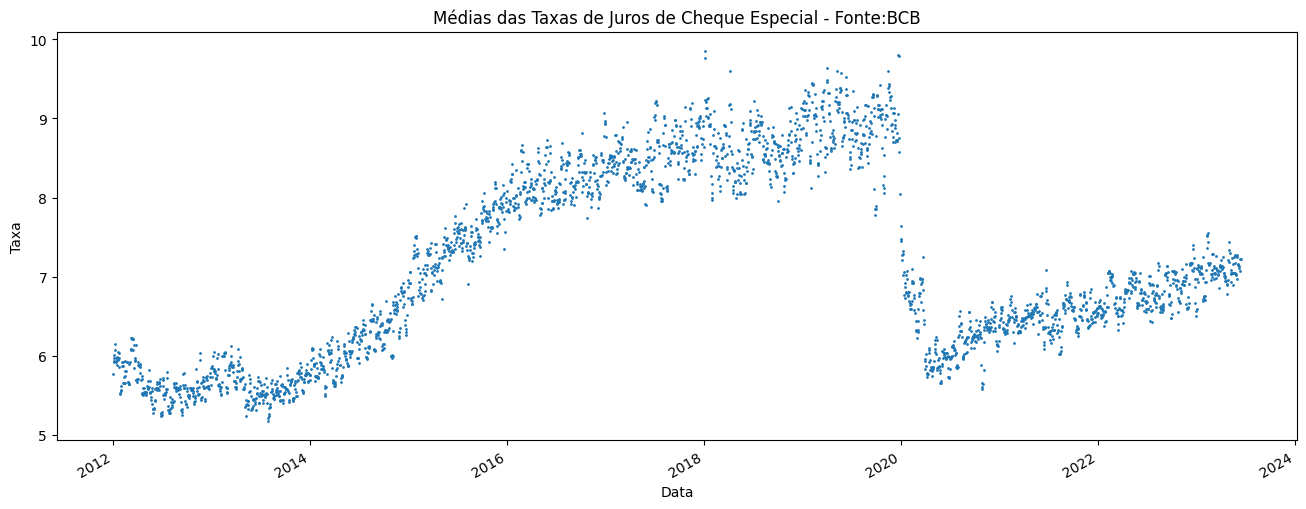

In [9]:
df_mean['TaxaJurosAoMes'].plot(figsize=(16,6), style='o', markersize=1,
                               xlabel='Data', ylabel='Taxa',
                               title='Médias das Taxas de Juros de Cheque Especial - Fonte:BCB');

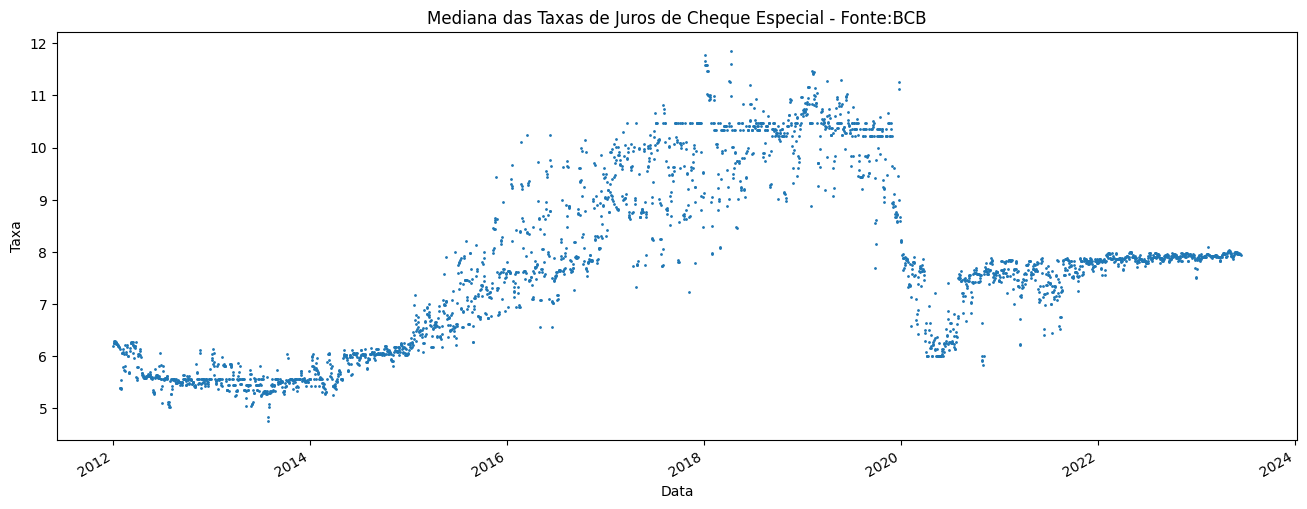

In [12]:
import pandas as pd

em = TaxaJuros()
ep = em.get_endpoint('TaxasJurosDiariaPorInicioPeriodo')
df_cheque = (ep.query()
                .filter(ep.Segmento == 'PESSOA FÍSICA',
                        ep.Modalidade == 'Cheque especial - Pré-fixado')
                .collect())
grp = df_cheque.groupby('InicioPeriodo')
df_mean = grp.agg({'TaxaJurosAoMes': 'median'})
df_mean['TaxaJurosAoMes'].plot(figsize=(16,6), style='o', markersize=1,
                                xlabel='Data', ylabel='Taxa',
                                title='Mediana das Taxas de Juros de Cheque Especial - Fonte:BCB');


In [13]:
from bcb import TarifasBancariasPorInstituicaoFinanceira
em = TarifasBancariasPorInstituicaoFinanceira()
em.describe()

EntitySets:
  GruposConsolidados
FunctionImports:
  ListaTarifasPorInstituicaoFinanceira
  ListaInstituicoesDeGrupoConsolidado


In [14]:
em.describe('ListaTarifasPorInstituicaoFinanceira')


Function: ListaTarifasPorInstituicaoFinanceira
Parameters: PessoaFisicaOuJuridica <str>, CNPJ <str>
EntitySet: _ListaTarifasPorInstituicaoFinanceira
EntityType: br.gov.bcb.olinda.servico.Informes_ListaTarifasPorInstituicaoFinanceira.TarifaPorIF
Properties: CodigoServico <str>, Servico <str>, Unidade <str>, DataVigencia <str>, ValorMaximo <float>, TipoValor <str>, Periodicidade <str>


In [15]:
ep = em.get_endpoint('GruposConsolidados')
ep.query().limit(30).collect()

,Codigo,Nome
0,01,Bancos privados
1,02,Bancos públicos + Caixa Econômica Federal
2,03,Bancos privados + Bancos públicos + Caixa Econ...
3,04,Cooperativas de Crédito
4,05,Bancos de Desenvolvimento e Investimento
5,06,Agências de Fomento e Companhias Hipotecaria
6,07,"Sociedades de Crédito, Financiamento e Investi..."
7,08,Sociedades de Arrendamento Mercantil
8,09,Sociedades Distribuidoras...
9,10,Associações de poupança e empréstimos e socied...


In [16]:
ep = em.get_endpoint('ListaInstituicoesDeGrupoConsolidado')
df = ep.query().parameters(CodigoGrupoConsolidado='01').collect()

In [17]:
df[df['Nome'].str.contains('ITAU')]

,Cnpj,Nome
137,60394079,BANCO ITAUBANK S.A.
141,17192451,BANCO ITAUCARD S.A.


In [18]:
ep = em.get_endpoint('ListaTarifasPorInstituicaoFinanceira')
ep.query().limit(10).parameters(CNPJ='17192451', PessoaFisicaOuJuridica='F').collect()

,CodigoServico,Servico,Unidade,DataVigencia,ValorMaximo,TipoValor,Periodicidade
0,1101,Confecção de cadastro para início de relaciona...,Por cliente,2023-04-18,896.0,Real,Por evento
1,1601,Anuidade - cartão básico nacional,a cada 365 dias,2022-12-31,110.4,Real,A cada 360 dias
2,1602,Fornecimento de 2ª via de cartão com função cr...,por evento,2017-03-20,9.9,Real,Por evento
3,1603,Utilização de canais de atend. para retirada e...,por evento,2016-05-26,12.0,Real,Por evento
4,1605,Avaliação emergencial de crédito,por evento,2023-01-19,0.0,Real,Por evento
5,1607,Utilização de canais de atend. para retirada e...,por evento,2016-05-26,22.0,Real,Por evento
6,1703,Venda de moeda estrangeira - cartão pré-pago -...,Por operação,2023-03-28,0.0,Real,Por evento
7,1704,Venda de moeda estrangeira - cartão pré-pago -...,Por operação,2023-03-18,0.0,Real,Por evento
8,1707,Compra de moeda estrangeira - cartão pré-pago,Por operação,2023-03-18,0.0,Real,Por evento


In [19]:
ep = em.get_endpoint('GruposConsolidados')
ep.query().limit(10).collect()

,Codigo,Nome
0,01,Bancos privados
1,02,Bancos públicos + Caixa Econômica Federal
2,03,Bancos privados + Bancos públicos + Caixa Econ...
3,04,Cooperativas de Crédito
4,05,Bancos de Desenvolvimento e Investimento
5,06,Agências de Fomento e Companhias Hipotecaria
6,07,"Sociedades de Crédito, Financiamento e Investi..."
7,08,Sociedades de Arrendamento Mercantil
8,09,Sociedades Distribuidoras...
9,10,Associações de poupança e empréstimos e socied...


In [20]:
from bcb import Expectativas

In [21]:
# service = me.get_service()
# api = service['ExpectativasMercadoAnuais']
# service.query(api).limit(10).filter()

me = Expectativas()
api = me.get_endpoint('ExpectativasMercadoAnuais')
df = api.get(
    api.Indicador == 'IPCA', api.Data >= '2022-01-01',
    api.Data.asc(),
    api.Data, api.DataReferencia, api.Media,
    limit=10, skip=10
)

# api.filter().orderby().select().limit().skip().get()

In [22]:
df

,Data,DataReferencia,Media
0,2022-01-04,2021-01-01,10.0158
1,2022-01-04,2022-01-01,5.1008
2,2022-01-04,2023-01-01,3.4629
3,2022-01-04,2024-01-01,3.2114
4,2022-01-04,2025-01-01,3.1945
5,2022-01-04,2021-01-01,10.0044
6,2022-01-04,2022-01-01,5.0389
7,2022-01-04,2023-01-01,3.4391
8,2022-01-04,2024-01-01,3.1784
9,2022-01-04,2025-01-01,3.1790


In [23]:
me.describe()

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoSelic
  ExpectativasMercadoTop5Selic
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais


In [24]:
me.describe('ExpectativasMercadoTop5Anuais')


EntitySet (Endpoint): ExpectativasMercadoTop5Anuais
EntityType: br.gov.bcb.olinda.servico.Expectativas.ExpectativasMercadoTop5Anual
Properties: Indicador<str>, Data<str>, DataReferencia<str>, tipoCalculo<str>, Media<float>, Mediana<float>, DesvioPadrao<float>, Minimo<float>, Maximo<float>


In [25]:
df

,Data,DataReferencia,Media
0,2022-01-04,2021-01-01,10.0158
1,2022-01-04,2022-01-01,5.1008
2,2022-01-04,2023-01-01,3.4629
3,2022-01-04,2024-01-01,3.2114
4,2022-01-04,2025-01-01,3.1945
5,2022-01-04,2021-01-01,10.0044
6,2022-01-04,2022-01-01,5.0389
7,2022-01-04,2023-01-01,3.4391
8,2022-01-04,2024-01-01,3.1784
9,2022-01-04,2025-01-01,3.1790


In [23]:
from bcb import PTAX

In [24]:

ptax = PTAX()
ptax.describe()

EntitySets:
  Moedas
FunctionImports:
  CotacaoMoedaPeriodoFechamento
  CotacaoMoedaAberturaOuIntermediario
  CotacaoMoedaDia
  CotacaoMoedaPeriodo
  CotacaoDolarDia
  CotacaoDolarPeriodo


In [25]:
ptax.describe('Moedas')


EntitySet (Endpoint): Moedas
EntityType: br.gov.bcb.olinda.servico.PTAX.TipoMoeda
Properties: simbolo<str>, nomeFormatado<str>, tipoMoeda<str>


In [26]:
api = ptax.get_endpoint('Moedas')
api.get(
    api.tipoMoeda == 'B',
    limit=10
)

,simbolo,nomeFormatado,tipoMoeda
0,AUD,Dólar australiano,B
1,EUR,Euro,B
2,GBP,Libra Esterlina,B


In [27]:
ptax.describe('CotacaoMoedaPeriodo')


Function: CotacaoMoedaPeriodo
Parameters: moeda <str>, dataInicial <str>, dataFinalCotacao <str>
EntitySet: _CotacaoMoedaPeriodo
EntityType: br.gov.bcb.olinda.servico.PTAX.TipoCotacaoMoeda
Properties: paridadeCompra <float>, paridadeVenda <float>, cotacaoCompra <float>, cotacaoVenda <float>, dataHoraCotacao <str>, tipoBoletim <str>


In [28]:
api = ptax.get_endpoint('CotacaoMoedaPeriodo')
api.get(
    api.dataHoraCotacao, api.cotacaoCompra, api.cotacaoVenda,
    limit=10,
    moeda='USD',
    dataInicial='01/01/2022',
    dataFinalCotacao='01/10/2022'
)

,cotacaoCompra,cotacaoVenda,dataHoraCotacao
0,5.5884,5.5890,2022-01-03 10:04:22.186
1,5.6242,5.6248,2022-01-03 11:11:42.883
2,5.6444,5.6450,2022-01-03 12:09:19.760
3,5.6643,5.6649,2022-01-03 13:11:50.353
4,5.6303,5.6309,2022-01-03 13:11:50.357
5,5.6902,5.6908,2022-01-04 10:05:22.015
6,5.7015,5.7021,2022-01-04 11:05:20.148
7,5.6487,5.6493,2022-01-04 12:10:19.466
8,5.6674,5.6680,2022-01-04 13:08:59.118
9,5.6770,5.6776,2022-01-04 13:08:59.123


In [32]:
from bcb import IFDATA

In [33]:
ifdata = IFDATA()
ifdata.describe()

FunctionImports:
  ListaDeRelatorio
  IfDataCadastro
  IfDataValores


In [34]:
ifdata.describe('ListaDeRelatorio')


Function: ListaDeRelatorio
Parameters: 
EntitySet: _ListaDeRelatorio
EntityType: br.gov.bcb.olinda.servico.IFDATA.ListaRelatorio
Properties: NomeRelatorio <str>, NumeroRelatorio <str>


In [35]:
api = ifdata.get_endpoint('ListaDeRelatorio')
api.get(limit=10)

,NomeRelatorio,NumeroRelatorio
0,Resumo,1
1,Ativo,2
2,Passivo,3
3,Demonstração de Resultado,4
4,Informações de Capital,5
5,Segmentação,6
6,Carteira de Crédito Ativa - Por indexador,7
7,Carteira de crédito ativa - por nível de risco...,8
8,Carteira de crédito ativa - por região geográfica,9
9,Carteira de crédito ativa - quantidade de clie...,10


In [36]:
ifdata.describe('IfDataCadastro')


Function: IfDataCadastro
Parameters: AnoMes <int>
EntitySet: _IfDataCadastro
EntityType: br.gov.bcb.olinda.servico.IFDATA.TipoIfDataCadastro
Properties: CodInst <str>, Data <str>, NomeInstituicao <str>, DataInicioAtividade <int>, Tcb <str>, Td <str>, Tc <int>, SegmentoTb <str>, Atividade <str>, Uf <str>, Municipio <str>, Sr <str>, CodConglomeradoFinanceiro <str>, CodConglomeradoPrudencial <str>, CnpjInstituicaoLider <str>, Situacao <str>


In [40]:
api = ifdata.get_endpoint('IfDataCadastro')
api.get(limit=10, AnoMes=202110)

[autoreload of bcb failed: Traceback (most recent call last):
  File "c:\Users\wilso\AppData\Local\pypoetry\Cache\virtualenvs\python-bcb-fnNEZeeT-py3.10\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\wilso\AppData\Local\pypoetry\Cache\virtualenvs\python-bcb-fnNEZeeT-py3.10\lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\wilso\AppData\Local\pypoetry\Cache\virtualenvs\python-bcb-fnNEZeeT-py3.10\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\wilso\AppData\Local\pypoetry\Cache\virtualenvs\python-bcb-fnNEZeeT-py3.10\lib\site-packages\IPython\extensions\autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "c:\Users\wilso\AppData\Local\pypoetry\Cache\virtualenvs\python-bcb-fnNEZeeT-py3.10\lib\site-packages\IPython\extensions\autore

,CodInst,Data,NomeInstituicao,DataInicioAtividade,Tcb,Td,Tc,SegmentoTb,Atividade,Uf,Municipio,Sr,CodConglomeradoFinanceiro,CodConglomeradoPrudencial,CnpjInstituicaoLider,Situacao
0,C0041856,2021-10-01,ABC-BRASIL,180001,B1,C,3,None,Crédito Atacado,SP,São Paulo,S3,C0041856,C0080312,28195667,A
1,C0080312,2021-10-01,ABC-BRASIL - PRUDENCIAL,180001,B1,C,3,None,Crédito Atacado,SP,São Paulo,S3,C0041856,C0080312,28195667,A
2,C0051956,2021-10-01,AGIBANK,180001,B1,C,2,None,Crédito Varejo,SP,Campinas,S4,C0051956,C0083694,10664513,A
3,C0083694,2021-10-01,AGIBANK - PRUDENCIAL,180001,B1,C,2,None,Crédito Varejo,SP,Campinas,S4,C0051956,C0083694,10664513,A
4,01542356,2021-10-01,AGROBANCO-BANCO COMERCIAL S.A.,194602,B1,I,2,Banco Comercial,None,GO,Goiânia,None,None,None,None,I
5,C0051293,2021-10-01,ALFA,180001,B1,C,2,None,Crédito Diversificado,SP,São Paulo,S3,C0051293,C0080570,60770336,A
6,C0080570,2021-10-01,ALFA - PRUDENCIAL,180001,B1,C,2,None,Crédito Diversificado,SP,São Paulo,S3,C0051293,C0080570,60770336,A
7,C0051949,2021-10-01,ANDBANK,180001,B1,C,3,None,Tesouraria e Negócios,SP,São Paulo,S4,C0051949,C0081256,48795256,A
8,C0081256,2021-10-01,ANDBANK - PRUDENCIAL,180001,B1,C,3,None,Tesouraria e Negócios,SP,São Paulo,S4,C0051949,C0081256,48795256,A
9,28195667,2021-10-01,BANCO ABC BRASIL S.A.,198312,B1,I,3,Banco Múltiplo,None,SP,São Paulo,S3,C0041856,C0080312,28195667,A


In [41]:
from bcb import TaxaJuros

tj = TaxaJuros()

In [43]:
tj.describe()
tj.describe('ParametrosConsulta')
tj.describe('TaxasJurosMensalPorMes')
tj.describe('TaxasJurosDiariaPorInicioPeriodo')
tj.describe('ConsultaUnificada')
tj.describe('ConsultaDatas')

EntitySets:
  TaxasJurosMensalPorMes
  ParametrosConsulta
  TaxasJurosDiariaPorInicioPeriodo
  ConsultaUnificada
  ConsultaDatas

EntitySet (Endpoint): ParametrosConsulta
EntityType: br.gov.bcb.olinda.servico.taxaJuros.ParametrosConsulta
Properties: codigoSegmento<str>, segmento<str>, codigoModalidade<str>, modalidade<str>, tipoModalidade<str>

EntitySet (Endpoint): TaxasJurosMensalPorMes
EntityType: br.gov.bcb.olinda.servico.taxaJuros.TaxaJurosMensal
Properties: Mes<str>, Modalidade<str>, Posicao<int>, InstituicaoFinanceira<str>, TaxaJurosAoMes<float>, TaxaJurosAoAno<float>, cnpj8<str>, anoMes<str>

EntitySet (Endpoint): TaxasJurosDiariaPorInicioPeriodo
EntityType: br.gov.bcb.olinda.servico.taxaJuros.TaxaJurosDiaria
Properties: InicioPeriodo<str>, FimPeriodo<str>, codigoSegmento<str>, Segmento<str>, codigoModalidade<str>, Modalidade<str>, Posicao<int>, InstituicaoFinanceira<str>, TaxaJurosAoMes<float>, TaxaJurosAoAno<float>, cnpj8<str>

EntitySet (Endpoint): ConsultaUnificada
EntityTy

In [44]:
api = tj.get_endpoint('ParametrosConsulta')
api.get(limit=10)

,codigoSegmento,segmento,codigoModalidade,modalidade,tipoModalidade
0,1,Pessoa Física,204101,Cartão de crédito - rotativo total - Pré-fixado,D
1,2,Pessoa Jurídica,210101,Capital de giro com prazo até 365 dias - Pré-f...,D
2,2,Pessoa Jurídica,210204,Capital de giro com prazo até 365 dias - Pós-f...,D
3,2,Pessoa Jurídica,211101,Capital de giro com prazo superior a 365 dias ...,D
4,2,Pessoa Jurídica,211204,Capital de giro com prazo superior a 365 dias ...,D
5,1,Pessoa Física,215101,Cartão de crédito - parcelado - Pré-fixado,D
6,1,Pessoa Física,216101,Cheque especial - Pré-fixado,D
7,2,Pessoa Jurídica,216101,Cheque especial - Pré-fixado,D
8,2,Pessoa Jurídica,217101,Conta garantida - Pré-fixado,D
9,2,Pessoa Jurídica,217204,Conta garantida - Pós-fixado referenciado em j...,D


In [48]:
api = tj.get_endpoint('TaxasJurosMensalPorMes')
api.get(api.Mes == 'Jan-2020', limit=10)

,Mes,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,cnpj8,anoMes
0,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,CAIXA ECONOMICA FEDERAL,0.39,4.75,00360305,2020-01
1,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,APE POUPEX,0.37,4.49,00655522,2020-01
2,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,BRB - BCO DE BRASILIA S.A.,0.53,6.57,00000208,2020-01
3,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,CH PIRATINI - CHP,1.04,13.25,18282093,2020-01
4,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,2,APE POUPEX,0.39,4.80,00655522,2020-01
5,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,BCO BANESTES S.A.,0.55,6.79,28127603,2020-01
6,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,2,BCO BANESTES S.A.,0.54,6.69,28127603,2020-01
7,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,2,APE POUPEX,1.22,15.72,00655522,2020-01
8,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,3,BCO DO BRASIL S.A.,0.52,6.41,00000000,2020-01
9,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,2,BCO DO EST. DE SE S.A.,0.57,7.07,13009717,2020-01


In [3]:
from bcb import SPI

spi = SPI()

In [4]:
spi.describe()
spi.describe('PixLiquidadosAtual')
spi.describe('PixLiquidadosIntradia')

EntitySets:
  PixLiquidadosAtual
  PixRemuneracaoContaPI
  PixLiquidadosIntradia
  PixDisponibilidadeSPI

EntitySet (Endpoint): PixLiquidadosAtual
EntityType: br.gov.bcb.olinda.servico.SPI.PixLiquidadosAtual
Properties: Data<datetime>, Quantidade<int>, Total<float>, Media<float>

EntitySet (Endpoint): PixLiquidadosIntradia
EntityType: br.gov.bcb.olinda.servico.SPI.PixLiquidadosIntradia
Properties: Horario<str>, QuantidadeMedia<int>, TotalMedio<float>


In [5]:
ep = spi.get_endpoint('PixLiquidadosAtual')
ep.query().orderby(ep.Data.desc()).collect()

,Data,Quantidade,Total,Media
0,2023-07-10,116598174,69202307.13,593.51
1,2023-07-09,73589494,10131080.12,137.67
2,2023-07-08,109249145,18767616.78,171.79
3,2023-07-07,134844164,59845044.44,443.81
4,2023-07-06,129444492,58811530.67,454.34
...,...,...,...,...
975,2020-11-07,11089,2333.89,210.47
976,2020-11-06,57936,21133.81,364.78
977,2020-11-05,16669,2685.84,161.13
978,2020-11-04,2629,336.37,127.94


In [15]:
ep = spi.get_endpoint('PixLiquidadosAtual')
ep.get(ep.Data.asc(), limit=10)

,Data,Quantidade,Total,Media
0,2020-11-03,2345,210.24,89.65
1,2020-11-04,2629,336.37,127.94
2,2020-11-05,16669,2685.84,161.13
3,2020-11-06,57936,21133.81,364.78
4,2020-11-07,11089,2333.89,210.47
5,2020-11-08,7049,1493.58,211.88
6,2020-11-09,88184,37004.03,419.62
7,2020-11-10,135444,55316.78,408.41
8,2020-11-11,216871,85757.62,395.43
9,2020-11-12,288401,118321.97,410.27


In [18]:
import logging

logging.basicConfig(level=logging.DEBUG)

In [46]:
from datetime import datetime


ep.query().select(ep.Data, ep.Media).filter(ep.Data >= datetime(2023, 1, 1)).orderby(ep.Media.desc()).limit(10).collect()

,Data,Media
0,2023-05-02,661.07
1,2023-04-10,661.04
2,2023-01-02,652.51
3,2023-01-30,642.01
4,2023-02-27,632.34
5,2023-04-03,627.14
6,2023-01-16,618.88
7,2023-07-03,617.47
8,2023-02-22,617.08
9,2023-05-15,611.98


In [48]:
ep.Data

<Property Data>

In [53]:
from bcb import MercadoImobiliario

mi = MercadoImobiliario()

In [54]:
mi.describe()
mi.describe('mercadoimobiliario')

EntitySets:
  mercadoimobiliario

EntitySet (Endpoint): mercadoimobiliario
EntityType: br.gov.bcb.olinda.servico.MercadoImobiliario.TipoCreditoImobiliario
Properties: Data<str>, Info<str>, Valor<float>


In [55]:
mi.get_endpoint('mercadoimobiliario').get(limit=20)

,Data,Info,Valor
0,2017-11-30,credito_estoque_carteira_credito_pj_sfh_ba,4.863160e+08
1,2015-06-30,credito_estoque_carteira_credito_pj_livre_pi,1.457705e+08
2,2015-03-31,credito_estoque_risco_operacao_pj_fgts_a_am,3.330000e+01
3,2022-03-31,credito_estoque_risco_operacao_pf_comercial_aa_pb,6.811000e+01
4,2016-07-31,credito_estoque_ativo_problematico_pf_sfh_ac,3.490377e+07
5,2022-03-31,credito_contratacao_indexador_pf_tr_go,6.091525e+08
6,2015-01-31,credito_estoque_risco_operacao_pf_home_equity_...,1.023000e+01
7,2015-01-31,credito_estoque_ativo_problematico_pf_sfh_ba,4.306840e+08
8,2017-03-31,credito_estoque_parcela_pf_sfh_pe,1.416290e+03
9,2020-11-30,direcionamento_reforma_ampliacao_residencial_br,2.237255e+08
